# Titanic Project

In [82]:
# Make necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
# Load data and check
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [85]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
# Drop PassengerId, Name, Cabin, Ticket
dropped_attribs = ['PassengerId', 'Name', 'Cabin', 'Ticket']
titanic_data.drop(dropped_attribs, axis = 1, inplace=True)

In [87]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3064b0b8>,
      dtype=object)

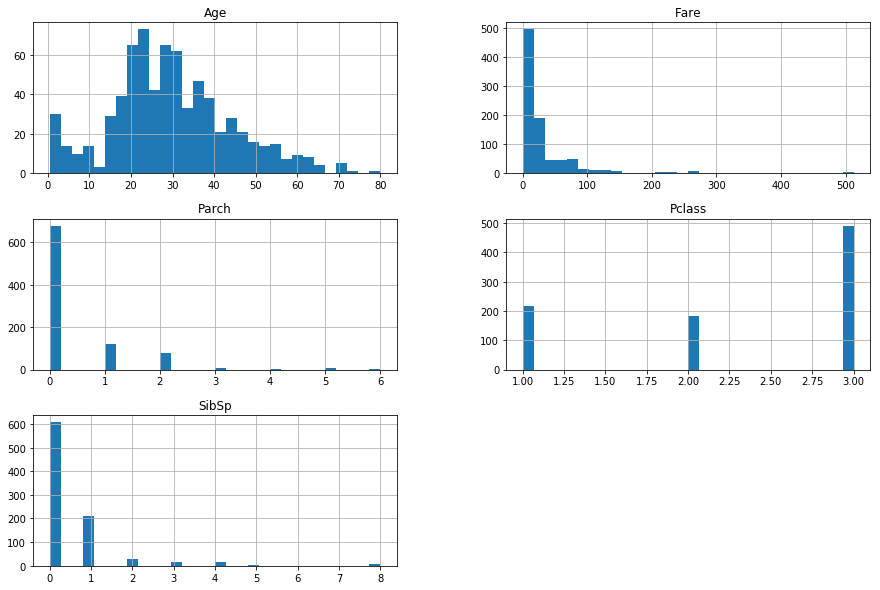

In [88]:
# Explore data visually
features_num.hist(bins = 30, figsize = (15,10))

In [49]:
# Inspect Correlations

In [89]:
corr_matrix = titanic_data.corr()

In [108]:
corr_matrix['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [109]:
# Drop unimportant features
dropped_attribs2 = ['Parch', 'SibSp', 'Age']
main_feature = titanic_data.drop(dropped_attribs2, axis = 1)
main_feature.dropna(subset = ['Embarked'], inplace= True)

In [113]:
main_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 41.7+ KB


In [114]:
main_feature.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S


In [116]:
# Separate features from labels and separate categorical features from numerical ones
features_num = main_feature.drop(['Sex', 'Embarked','Pclass', 'Survived'], axis=1)
features_cat = main_feature.drop(['Fare', 'Survived'], axis=1)
labels = main_feature['Survived']

# Prepare Data

In [121]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(features_cat)

array([[2., 1., 2.],
       [0., 0., 0.],
       [2., 0., 2.],
       ...,
       [2., 0., 2.],
       [0., 1., 0.],
       [2., 1., 1.]])